# A year's worth of properties sold on the NYC real estate market

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City.

In this project we're going to build a model that predicts the sale value.

In [1]:
import julian
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import cross_validation, metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

/home/ibtissem/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/ibtissem/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('nyc-rolling-sales.csv', index_col=0)

In [3]:
df = df.reset_index(drop=True)

## Data exploration

In [4]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YE

In [6]:
col_obj=[col for col in df.columns.values if df[col].dtype=='object']
for col in col_obj:
    print('*******************************')
    print(col)
    print('nunique: ',df[col].nunique())
    print(df[col].unique())

*******************************
NEIGHBORHOOD
nunique:  254
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRIDGE/MORRIS HE

['2017-07-19 00:00:00' '2016-12-14 00:00:00' '2016-12-09 00:00:00'
 '2016-09-23 00:00:00' '2016-11-17 00:00:00' '2017-07-20 00:00:00'
 '2017-06-20 00:00:00' '2016-11-07 00:00:00' '2016-10-17 00:00:00'
 '2016-09-06 00:00:00' '2017-03-10 00:00:00' '2017-04-28 00:00:00'
 '2017-06-09 00:00:00' '2017-07-14 00:00:00' '2017-03-16 00:00:00'
 '2016-09-01 00:00:00' '2017-08-17 00:00:00' '2016-09-07 00:00:00'
 '2017-08-30 00:00:00' '2017-06-21 00:00:00' '2017-01-30 00:00:00'
 '2017-07-07 00:00:00' '2017-08-04 00:00:00' '2017-01-09 00:00:00'
 '2017-04-18 00:00:00' '2017-06-19 00:00:00' '2017-08-28 00:00:00'
 '2017-05-10 00:00:00' '2016-12-02 00:00:00' '2017-01-31 00:00:00'
 '2017-06-28 00:00:00' '2016-12-07 00:00:00' '2017-08-24 00:00:00'
 '2017-06-27 00:00:00' '2017-03-17 00:00:00' '2017-06-14 00:00:00'
 '2017-01-17 00:00:00' '2017-01-11 00:00:00' '2017-04-21 00:00:00'
 '2017-06-29 00:00:00' '2016-10-05 00:00:00' '2017-02-02 00:00:00'
 '2017-03-20 00:00:00' '2017-04-13 00:00:00' '2017-06-06 00:00

In [7]:
col_obj=[col for col in df.columns.values if df[col].dtype=='int64']
for col in col_obj:
    print('*******************************')
    print(col)
    print('nunique: ',df[col].nunique())
    print(df[col].unique())

*******************************
BOROUGH
nunique:  5
[1 2 3 4 5]
*******************************
BLOCK
nunique:  11566
[ 392  399  402 ..., 6918 7074 7092]
*******************************
LOT
nunique:  2627
[  6  26  39 ..., 655 423 679]
*******************************
ZIP CODE
nunique:  186
[10009     0 10002 10011 10001 10014 10010 10013 10038 10007 10036 10019
 10018 10003 10005 10004 10006 10016 10012 10026 10030 10031 10027 10035
 10037 10029 10039 10032 10128 10463 10034 10025 10022 10017 10167 10023
 10105 10033 10044 10280 10282 10281 10065 10021 10075 10028 10024 10069
 10040 10457 10458 10451 10456 10469 10466 10475 10468 10467 10460 10473
 10472 10464 10462 10803 10465 10459 10471 10453 10452 10454 10474 10455
 10461 10470 11228 11214 11220 11209 11219 11221 11233 11213 11206 11216
 11205 11238 11226 11204 11234 11217 11201 11218 11232 11230 11235 11212
 11237 11207 11236 11239 11231 11249 11224 11225 11208 11210 11203 11229
 11215 11223 11222 11211 11370 11691 11692 11102 11

## Data Cleaning

In [8]:
df.drop(['EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'TOTAL UNITS', 'BOROUGH', 'BLOCK', 'LOT', 'NEIGHBORHOOD', 'GROSS SQUARE FEET', 'BUILDING CLASS AT PRESENT'], axis=1, inplace=True)

In [9]:
df[['SALE PRICE','LAND SQUARE FEET']]=df[['SALE PRICE', 'LAND SQUARE FEET']].replace(' -  ', np.nan).astype(float)

In [10]:
df[['TAX CLASS AT PRESENT']]=df[['TAX CLASS AT PRESENT']].replace(' ',np.nan)

In [11]:
df[['ZIP CODE', 'YEAR BUILT', 'SALE PRICE', 'LAND SQUARE FEET']]=df[['ZIP CODE', 'YEAR BUILT', 'SALE PRICE', 'LAND SQUARE FEET']].replace(0, np.nan)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 11 columns):
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              83810 non-null object
ZIP CODE                          83566 non-null float64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
LAND SQUARE FEET                  47970 non-null float64
YEAR BUILT                        77578 non-null float64
TAX CLASS AT TIME OF SALE         84548 non-null int64
BUILDING CLASS AT TIME OF SALE    84548 non-null object
SALE PRICE                        59759 non-null float64
SALE DATE                         84548 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 7.1+ MB


In [13]:
df['YEAR BUILT'].isnull().sum()

6970

In [14]:
df.dropna(subset=['SALE PRICE'],axis=0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59759 entries, 0 to 84547
Data columns (total 11 columns):
BUILDING CLASS CATEGORY           59759 non-null object
TAX CLASS AT PRESENT              59166 non-null object
ZIP CODE                          59103 non-null float64
RESIDENTIAL UNITS                 59759 non-null int64
COMMERCIAL UNITS                  59759 non-null int64
LAND SQUARE FEET                  30373 non-null float64
YEAR BUILT                        55449 non-null float64
TAX CLASS AT TIME OF SALE         59759 non-null int64
BUILDING CLASS AT TIME OF SALE    59759 non-null object
SALE PRICE                        59759 non-null float64
SALE DATE                         59759 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 5.5+ MB


In [16]:
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].map(lambda x: x[:2])

In [17]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '22', '46', '01', '02', '03', '04', '21', '23', '25', '26', '29',
       '37', '38', '43', '44', '28', '47', '31', '41', '30', '34', '27',
       '36', '40', '42', '32', '45', '49', '33', '05', '06', '35', '48',
       '39'], dtype=object)

In [18]:
df.isnull().sum()

BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                593
ZIP CODE                            656
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
LAND SQUARE FEET                  29386
YEAR BUILT                         4310
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [19]:
(df['TAX CLASS AT PRESENT']!=df['TAX CLASS AT TIME OF SALE']).sum()

59759

In [20]:
df.dropna(subset=['LAND SQUARE FEET'],axis=0, inplace=True)

In [21]:
df.isnull().sum()

BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT                0
ZIP CODE                          300
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
LAND SQUARE FEET                    0
YEAR BUILT                        818
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30373 entries, 0 to 84547
Data columns (total 11 columns):
BUILDING CLASS CATEGORY           30373 non-null object
TAX CLASS AT PRESENT              30373 non-null object
ZIP CODE                          30073 non-null float64
RESIDENTIAL UNITS                 30373 non-null int64
COMMERCIAL UNITS                  30373 non-null int64
LAND SQUARE FEET                  30373 non-null float64
YEAR BUILT                        29555 non-null float64
TAX CLASS AT TIME OF SALE         30373 non-null int64
BUILDING CLASS AT TIME OF SALE    30373 non-null object
SALE PRICE                        30373 non-null float64
SALE DATE                         30373 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.8+ MB


In [23]:
df['TAX CLASS AT PRESENT'].unique()

array(['2A', '2B', '2', '4', '1', '2C', '1B'], dtype=object)

In [24]:
df['TAX CLASS AT PRESENT']=df[df['TAX CLASS AT PRESENT'].notnull()]['TAX CLASS AT PRESENT'].map(lambda x: x[0])

In [25]:
df['TAX CLASS AT PRESENT'].unique()

array(['2', '4', '1'], dtype=object)

In [26]:
(df['TAX CLASS AT PRESENT']!=df['TAX CLASS AT TIME OF SALE']).sum()

30373

In [27]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format='%Y-%m-%d %H:%M:%S')
df['AGE'] = df['SALE DATE'].dt.year - df['YEAR BUILT']

In [28]:
df.drop('YEAR BUILT', axis=1, inplace=True)

In [29]:
df.dropna(subset=['ZIP CODE', 'AGE'],axis=0, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29534 entries, 0 to 84547
Data columns (total 11 columns):
BUILDING CLASS CATEGORY           29534 non-null object
TAX CLASS AT PRESENT              29534 non-null object
ZIP CODE                          29534 non-null float64
RESIDENTIAL UNITS                 29534 non-null int64
COMMERCIAL UNITS                  29534 non-null int64
LAND SQUARE FEET                  29534 non-null float64
TAX CLASS AT TIME OF SALE         29534 non-null int64
BUILDING CLASS AT TIME OF SALE    29534 non-null object
SALE PRICE                        29534 non-null float64
SALE DATE                         29534 non-null datetime64[ns]
AGE                               29534 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [31]:
df.isnull().sum()

BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
LAND SQUARE FEET                  0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
AGE                               0
dtype: int64

In [32]:
df.duplicated().sum()

215

In [33]:
df=df.drop_duplicates()

In [34]:
df['YEAR']=(df['SALE DATE'].dt.year).astype('object')

In [35]:
df['YEAR'].unique()

array([2017, 2016], dtype=object)

In [36]:
df['SALE JD']=df['SALE DATE'].map(lambda x:julian.to_jd(x, fmt='jd'))

In [37]:
df['ZIP CODE']=df['ZIP CODE'].astype(int)

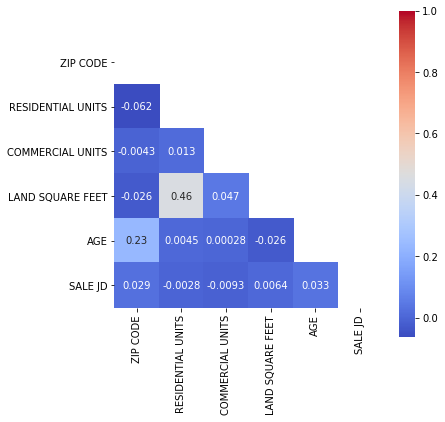

In [38]:
columns=[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col not in ['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','YEAR']]
corr=pd.DataFrame(np.corrcoef(df[columns].values.T), columns, columns)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, annot=True, square=True, cmap='coolwarm')

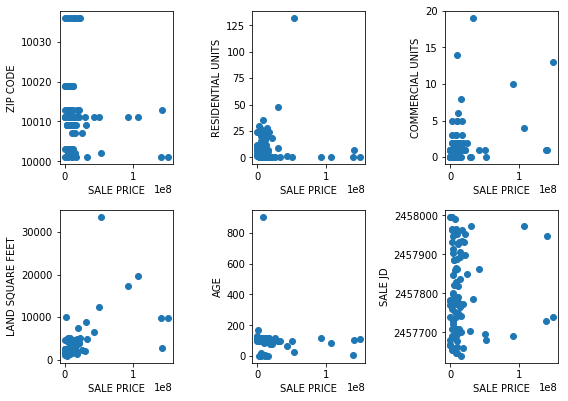

In [39]:
features=[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col not in ['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','YEAR']]
plt.figure(figsize=(8,8))
for i, feat in enumerate (features):
    plt.subplot(3,3,i+1)
    plt.scatter(df['SALE PRICE'][:100], df[feat][:100])
    plt.xlabel('SALE PRICE')
    plt.ylabel(feat)
plt.tight_layout()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29319 entries, 0 to 84547
Data columns (total 13 columns):
BUILDING CLASS CATEGORY           29319 non-null object
TAX CLASS AT PRESENT              29319 non-null object
ZIP CODE                          29319 non-null int64
RESIDENTIAL UNITS                 29319 non-null int64
COMMERCIAL UNITS                  29319 non-null int64
LAND SQUARE FEET                  29319 non-null float64
TAX CLASS AT TIME OF SALE         29319 non-null int64
BUILDING CLASS AT TIME OF SALE    29319 non-null object
SALE PRICE                        29319 non-null float64
SALE DATE                         29319 non-null datetime64[ns]
AGE                               29319 non-null float64
YEAR                              29319 non-null object
SALE JD                           29319 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 3.1+ MB


In [41]:
var_to_encode=['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','YEAR']
df = pd.get_dummies(df, columns=var_to_encode, drop_first=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29319 entries, 0 to 84547
Columns: 346 entries, RESIDENTIAL UNITS to YEAR_2017
dtypes: datetime64[ns](1), float64(4), int64(2), uint8(339)
memory usage: 11.3 MB


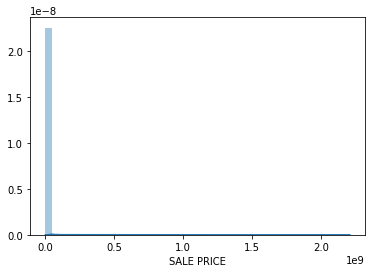

In [43]:
sns.distplot(df['SALE PRICE'])

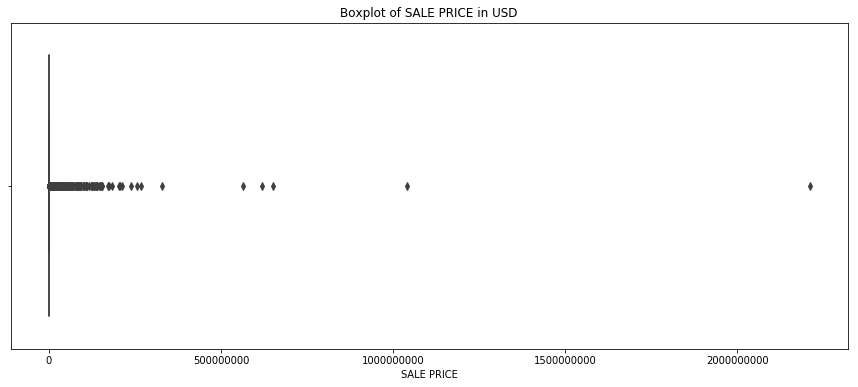

In [44]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')

In [45]:
#data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]
df=df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

In [46]:
df.shape[0]

26845

## Scaling

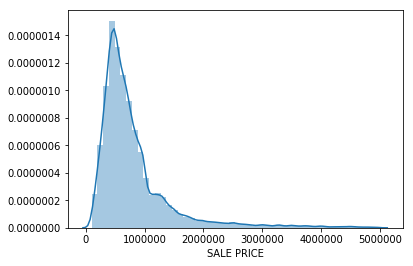

In [47]:
sns.distplot(df['SALE PRICE'])

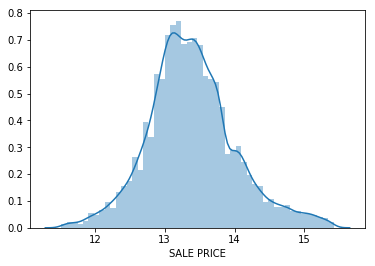

In [48]:
sns.distplot(np.log(df['SALE PRICE']))

In [49]:
cols=[col for col in df.columns.values if col!='SALE DATE']

In [50]:
df['SALE PRICE']=np.log(df['SALE PRICE']+1)

In [51]:
col_log=['COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'AGE']
df[col_log]=np.log(df[col_log]+1)

In [52]:
cols=[col for col in df.columns.values if col!='SALE DATE']
scaler=StandardScaler()
df[cols]=scaler.fit_transform(df[cols])

In [54]:
corr=pd.DataFrame(np.corrcoef(df[cols].values.T), cols, cols)

/home/ibtissem/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ibtissem/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## Building Linear Regression Model

In [55]:
X=df[[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017']].values
Y=df['SALE PRICE'].values

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)

In [57]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
predictions=model.predict(X_test)

In [59]:
print('R² test: ',metrics.r2_score(y_pred=predictions, y_true=y_test)) 
print('R² train: ',model.score(X_train, y_train))

R² test:  -2.96399006312e+26
R² train:  0.610182397458


In [60]:
X=df[[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017']].values
Y=df['SALE PRICE'].values
X= sm.add_constant(X)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)
results = sm.OLS(y_train, X_train).fit()
predict=results.predict(X_test)
print(results.summary())
print('R² test: ',metrics.r2_score(y_pred=predict, y_true=y_test)) 

/home/ibtissem/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:15:38   Log-Likelihood:                -17886.
No. Observations:               18791   AIC:                         3.630e+04
Df Residuals:                   18527   BIC:                         3.837e+04
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.349e+09   7.56e+09     -0.178      0.8

## Eliminating non significant features (high p value)

In [61]:
predictors=np.array([col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017'])
pvalues=results.pvalues
indexes=np.where(pvalues>0.05)[0]
cols_eliminate=predictors[(indexes-1).tolist()].tolist()

/home/ibtissem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [62]:
X=df[[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017' and col not in cols_eliminate]].values
Y=df['SALE PRICE'].values
X= sm.add_constant(X)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)
results = sm.OLS(y_train, X_train).fit()
predict=results.predict(X_test)
print(results.summary())
print('R² test: ',metrics.r2_score(y_pred=predict, y_true=y_test)) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     189.7
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:15:39   Log-Likelihood:                -20617.
No. Observations:               18791   AIC:                         4.142e+04
Df Residuals:                   18699   BIC:                         4.214e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.005      0.734      0.4

/home/ibtissem/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [63]:
predictors=np.array([col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017' and col not in cols_eliminate])
pvalues=results.pvalues
indexes2=np.where(pvalues>0.05)[0]
cols_eliminate2=predictors[(indexes2-1).tolist()].tolist()

/home/ibtissem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
X=df[[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017' and col not in cols_eliminate and col not in cols_eliminate2]].values
X= sm.add_constant(X)
Y=df['SALE PRICE'].values
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)
results = sm.OLS(y_train, X_train).fit()
predict=results.predict(X_test)
print(results.summary())
print('R² test: ',metrics.r2_score(y_pred=predict, y_true=y_test)) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:15:40   Log-Likelihood:                -20679.
No. Observations:               18791   AIC:                         4.152e+04
Df Residuals:                   18709   BIC:                         4.216e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.005      0.738      0.4

/home/ibtissem/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [65]:
predictors=np.array([col for col in df.columns.values if col!='SALE DATE' and col!='YEAR_2017' and col!='SALE PRICE' and col not in cols_eliminate and col not in cols_eliminate2])
pvalues=results.pvalues
indexes3=np.where(pvalues>0.05)[0]
cols_eliminate3=predictors[(indexes3-1).tolist()].tolist()
#cols_eliminate3

/home/ibtissem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
X=df[[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017' and col not in cols_eliminate and col not in cols_eliminate2 and col not in cols_eliminate3]].values
X= sm.add_constant(X)
Y=df['SALE PRICE'].values
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)
results = sm.OLS(y_train, X_train).fit()
predict=results.predict(X_test)
print(results.summary())
print('R² test: ',metrics.r2_score(y_pred=predict, y_true=y_test)) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:15:40   Log-Likelihood:                -20679.
No. Observations:               18791   AIC:                         4.152e+04
Df Residuals:                   18709   BIC:                         4.216e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.005      0.738      0.4

/home/ibtissem/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibtissem/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Final results

In [67]:
X = df[[col for col in df.columns.values if col!='SALE DATE' and col!='SALE PRICE' and col!='YEAR_2017' and col not in cols_eliminate and col not in cols_eliminate2 and col not in cols_eliminate3]].values
Y = df['SALE PRICE'].values
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('R² train: ',model.score(X_train, y_train))
print("R²test:", metrics.r2_score(y_pred=predictions, y_true=y_test))


R² train:  0.476566585072
R²test: 0.458845316732


## Ridge and Lasso

In [68]:
Xx = df[[col for col in df.columns.values if col!='SALE DATE' and col!='YEAR_2017' and col!='SALE PRICE']]
Yy = df['SALE PRICE']

alphas = 10**np.linspace(10,-2,100)*0.5
#Use the cross-validation package to split data into training and test sets
X_train, X_test , y_train, y_test = cross_validation.train_test_split(Xx, Yy, test_size = 0.3, random_state=0)

ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print("Lambda: ",ridgecv.alpha_)
#print(pd.Series(ridge.coef_, index = Xx.columns)) # Print coefficients
print("R² test: ", metrics.explained_variance_score(y_pred=pred, y_true=y_test))
print("R² train: ", metrics.explained_variance_score(y_pred=ridge.predict(X_train), y_true=y_train))
print("MSE: ",metrics.mean_squared_error(y_test, pred)) # Calculate the test MSE

Lambda:  616.423369721
R² test:  0.566973708392
R² train:  0.610334684229
MSE:  0.424996210567


In [69]:
lasso = Lasso(max_iter=10000)
lassocv = LassoCV(alphas=alphas, max_iter=100000)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
pred3 = lasso.predict(X_test)
print("Lambda: ",lassocv.alpha_)
#print(pd.Series(lasso.coef_, index = Xx.columns)) # Print coefficients
print("R² test: ", metrics.explained_variance_score(y_pred=pred3, y_true=y_test))
print("R² train: ", metrics.explained_variance_score(y_pred=lasso.predict(X_train), y_true=y_train))
print("MSE: ", metrics.mean_squared_error(y_test,pred3))

Lambda:  0.005
R² test:  0.562191529658
R² train:  0.604084415105
MSE:  0.429676693282
